# K Nearest Neighbors Algorithm

## The simplest supervised ML algorithm mostly used for solving classification problems.

## Classifies a data point based on how its neighbours are classified, then classifies new cases based on a similarity measure

---

# How to choose K Value

## This process is called parameter tuning

## We cna choose it by different ways

### 1) Trial and error
### 2) sqrt(n), where n is total number of data samples
### 3) Odd value of K is selected to avoid confusion

---

# When to use KNN?

## Dataset should be properly labeled

## Data should be noise free

## Works very well on small scale datasets since it is a lazy learner

## KNN is better when you want to create models with higher accuracy on cost of computational resouces

---

# How does KNN work?

## Caculate the Euclidean Distance (Distance between 2 points on a plane) between test point and other training points

## Choose the k values with the least euclidean distance

## Choose the most common label among the K nearest neighbours

---

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets 
data = datasets.load_wine(as_frame=True)

In [2]:
data 

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  ...  color_intensity   hue  od280/od315_of_diluted_wines  proline
 0      14.23        1.71  2.43               15.6  ...             5.64  1.04                          3.92   1065.0
 1      13.20        1.78  2.14               11.2  ...             4.38  1.05                          3.40   1050.0
 2      13.16        2.36  2.67               18.6  ...             5.68  1.03                          3.17   1185.0
 3      14.37        1.95  2.50               16.8  ...             7.80  0.86                          3.45   1480.0
 4      13.24        2.59  2.87               21.0  ...             4.32  1.04                          2.93    735.0
 ..       ...         ...   ...                ...  ...              ...   ...                           ...      ...
 173    13.71        5.65  2.45               20.5  ...             7.70  0.64                          1.74    740.0
 174    13.40        3.91  2.48               23

In [3]:
X = data.data 
y = data.target
names = data.target_names
print(names)

['class_0' 'class_1' 'class_2']


In [4]:
df = pd.DataFrame(X, columns=data.feature_names) 
df['wine_class'] = data.target 
df['wine_class'] = df['wine_class'].replace(to_replace=[0, 1, 2], value=['class_0', 'class_1', 'class_2']) 

In [5]:
df.head() 

alcohol  malic_acid   ash  alcalinity_of_ash  ...   hue  od280/od315_of_diluted_wines  proline  wine_class
0    14.23        1.71  2.43               15.6  ...  1.04                          3.92   1065.0     class_0
1    13.20        1.78  2.14               11.2  ...  1.05                          3.40   1050.0     class_0
2    13.16        2.36  2.67               18.6  ...  1.03                          3.17   1185.0     class_0
3    14.37        1.95  2.50               16.8  ...  0.86                          3.45   1480.0     class_0
4    13.24        2.59  2.87               21.0  ...  1.04                          2.93    735.0     class_0

[5 rows x 14 columns]

## Here, we can see that for the most part, the points are clustered according to the wine_class. Hence the KNN model will be a good fit

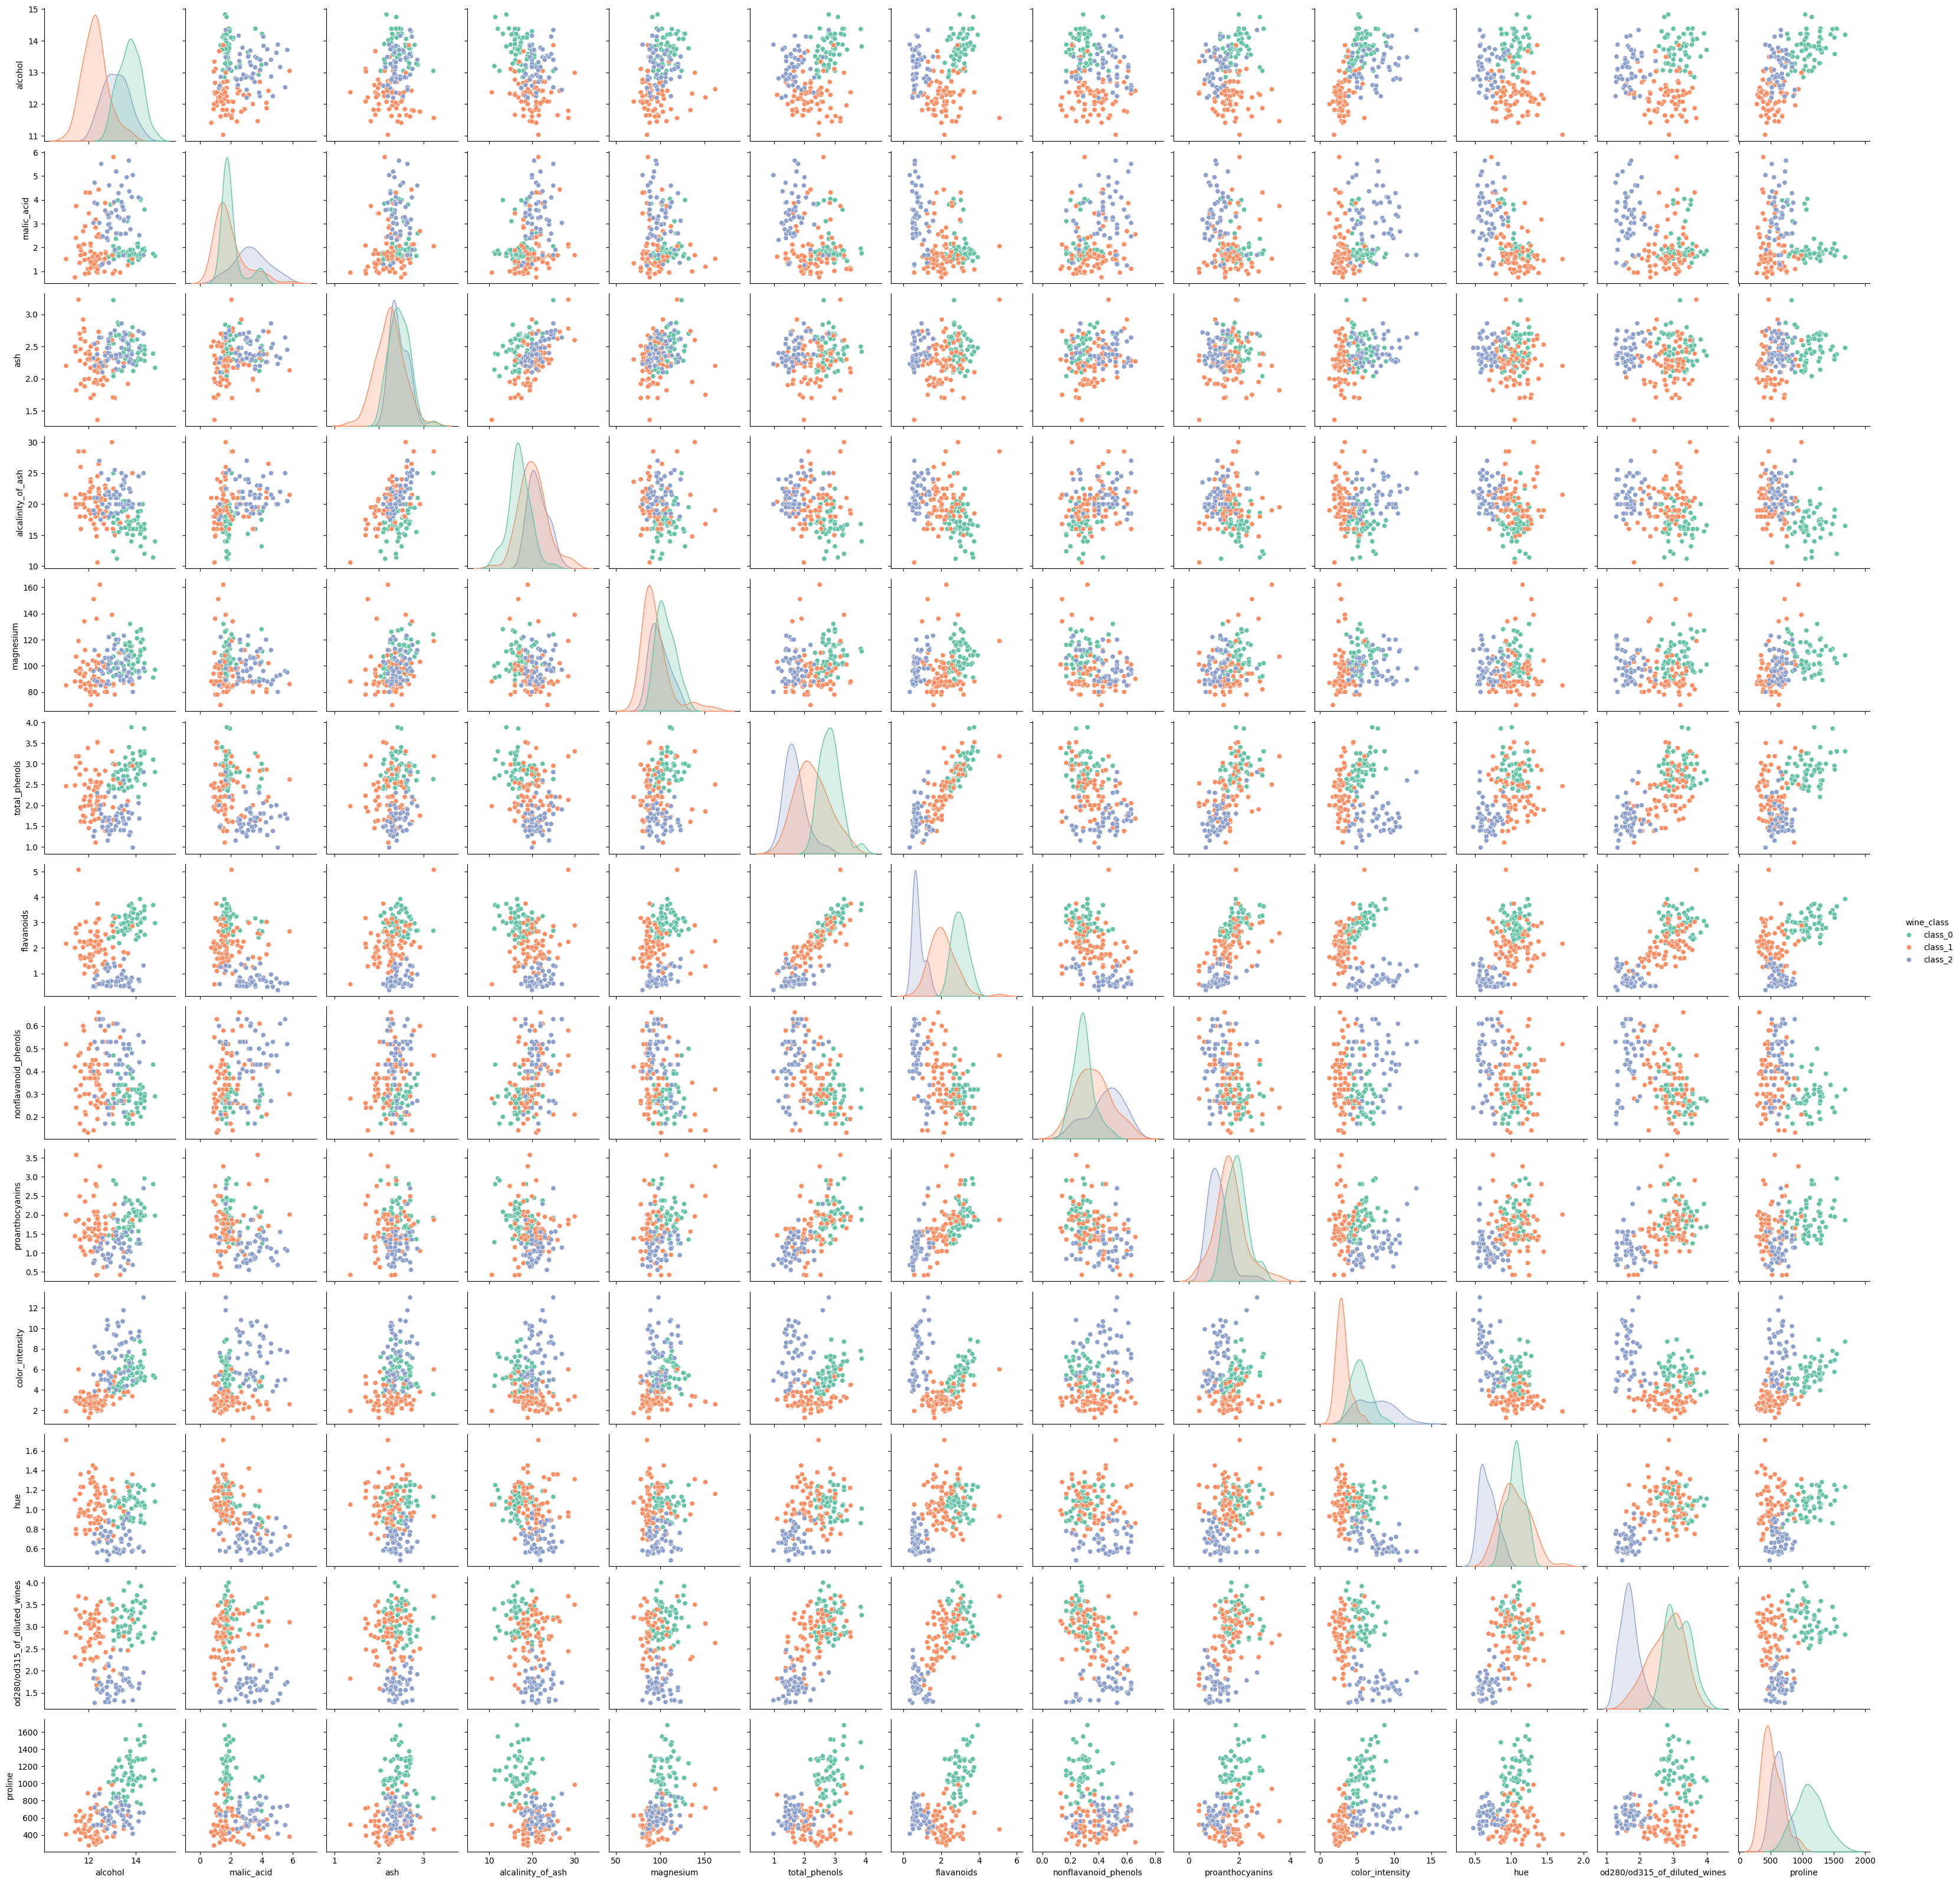

In [6]:
sns.pairplot(data=df, hue='wine_class', palette='Set2')

In [7]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_class                      0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

import math 
math.sqrt(len(y_test))

7.3484692283495345

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train) 
pred = knn.predict(X_test)

In [12]:
from sklearn import metrics 
metrics.accuracy_score(y_test, pred)

0.6481481481481481

## The accuracy of our model is not great since the variance in the dataset is quite high. Some colums are in the 4 digit ranges while some are single digit.

### Scaling is needed for KNN, SVM , Linear/Logistic Regression, and Neural Networks to bring down the variance. It makes each feature contribute fairly to the target variable

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn1.fit(X_train, y_train)
pred2 = knn1.predict(X_test)

In [15]:
metrics.accuracy_score(y_test, pred2)

0.9814814814814815